# ref https://www.cxybb.com/article/huakai16/78140304

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Preprocessing

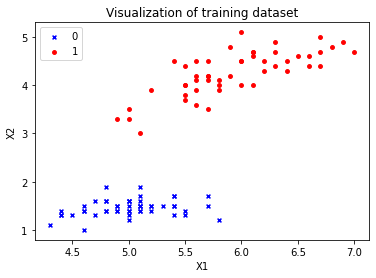

In [9]:
iris = load_iris()
data = iris.data
target = iris.target
# print (data[:10])
# print (target[10:])
X = data[0:100,[0,2]]
y = target[0:100]
# print (X[:5])
# print (y[-5:])
label = np.array(y)
index_0 = np.where(label==0)
plt.scatter(X[index_0,0],X[index_0,1],marker='x',color = 'b',label = '0',s = 15)
index_1 =np.where(label==1)
plt.scatter(X[index_1,0],X[index_1,1],marker='o',color = 'r',label = '1',s = 15)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Visualization of training dataset')
plt.legend(loc = 'upper left')
plt.show()

# Training Models(training dataset) 
## 编写逻辑回归模型的类

In [3]:
class logistic(object):
    def __init__(self):
        self.W = None
    def train(self,X,y,learn_rate = 0.01,num_iters = 5000):
        num_train,num_feature = X.shape
        #init the weight
        self.W = 0.001*np.random.randn(num_feature,1).reshape((-1,1))
        loss = []
        
        for i in range(num_iters):
            error,dW = self.compute_loss(X,y)
            self.W += -learn_rate*dW
            
            loss.append(error)
            # if i%200==0:
            #     print('i={:d}, error= {:f}'.format(i,error))
        return loss
    
    def compute_loss(self,X,y):
        num_train = X.shape[0]
        h = self.output(X) # the direct output from Sigmoid function = the proba of the predicted value
        self.h = h
        loss = -np.sum((y*np.log(h) + (1-y)*np.log((1-h))))
        loss = loss / num_train
        
        dW = X.T.dot((h-y)) / num_train
        return loss,dW
    
    def output(self,X):
        g = np.dot(X,self.W)
        return self.sigmod(g)

    def sigmod(self,X):
        return 1/(1+np.exp(-X))
    
    def predict(self,X_test):
        h = self.output(X_test)
        y_predl = np.where(h>=0.5,1,0)
        return y_predl

## 训练测试一下，并且可视化跟踪的损失loss

the final weight [[-0.61414714]
 [-1.60875627]
 [ 3.40052655]]
h in the last iteration is (50, 1) [[0.05149188]
 [0.03299763]
 [0.92848669]
 [0.08645849]
 [0.98899032]
 [0.06097952]
 [0.97259685]
 [0.98541081]
 [0.00283192]
 [0.97483896]
 [0.97657341]
 [0.98777467]
 [0.03720133]
 [0.01450431]
 [0.02329151]
 [0.00981836]
 [0.99635052]
 [0.98994334]
 [0.01699271]
 [0.98460012]
 [0.98899032]
 [0.99752888]
 [0.01699271]
 [0.99110805]
 [0.03720133]
 [0.01476824]
 [0.03128999]
 [0.02371148]
 [0.0220747 ]
 [0.98685838]
 [0.0064236 ]
 [0.9624475 ]
 [0.95768893]
 [0.00916644]
 [0.96951343]
 [0.02773503]
 [0.99469021]
 [0.98487516]
 [0.98259792]
 [0.98432016]
 [0.99614534]
 [0.00900171]
 [0.98637514]
 [0.03655137]
 [0.9935385 ]
 [0.93204746]
 [0.03853473]
 [0.02025947]
 [0.03241865]
 [0.02025947]]


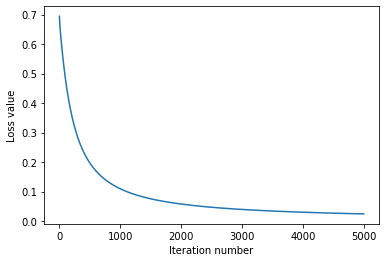

In [5]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

y = y.reshape((-1,1))
#add the x0=1
one = np.ones( (x_train.shape[0],1) )
X_train = np.hstack( (one, x_train) )

one_test = np.ones( (x_test.shape[0],1) )
X_test = np.hstack( (one_test, x_test) )

classify = logistic()
loss = classify.train(X_train,y_train)
print("the final weight", classify.W)
print("h in the last iteration is", classify.h.shape, classify.h)


plt.plot(loss)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

plt.show()

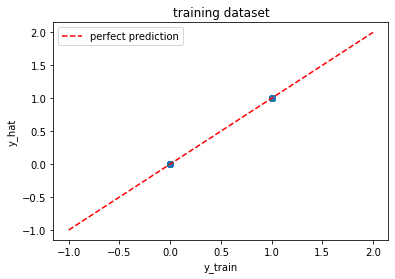

In [6]:
fig, ax=plt.subplots()
ax.scatter(y_train,classify.predict(X_train))
ax.plot([-1,2], [-1,2], "r--", label="perfect prediction")
plt.legend()
ax.set(xlabel="y_train", ylabel="y_hat",title="training dataset")
plt.show()

## 最后可视化“决策边界”

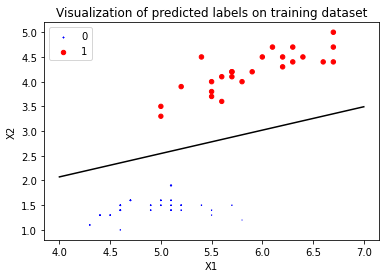

In [44]:
label = np.array(y_train)
index_0 = np.where(label==0)[0]
plt.scatter(X_train[index_0,1], X_train[index_0,2], marker='x', color='b', label='0', s=classify.h[index_0]*20)
index_1 = np.where(label==1)[0]
plt.scatter(X_train[index_1,1], X_train[index_1,2], marker='o', color='r', label='1', s=classify.h[index_1]*20)

#show the decision boundary
x1 = np.arange(4,7.5,0.5)
x2 = (- classify.W[0] - classify.W[1]*x1) / classify.W[2]
plt.plot(x1,x2,color = 'black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Visualization of predicted labels on training dataset')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# fig, ax=plt.subplots()
# ax.scatter(x1,x2)
# ax.plot([0,10], [0,10], "r--", label="perfect prediction")
# plt.legend()
# ax.set(xlabel="y_train", ylabel="y_hat",title="training dataset")
# plt.show()

# Using Models(testing dataset)

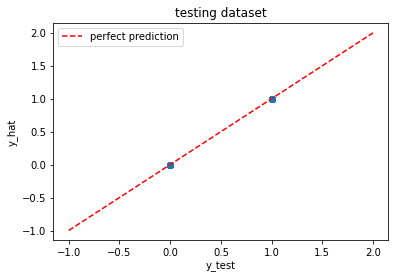

In [8]:
fig, ax=plt.subplots()
ax.scatter(y_test,classify.predict(X_test))
ax.plot([-1,2], [-1,2], "r--", label="perfect prediction")
plt.legend()
ax.set(xlabel="y_test", ylabel="y_hat",title="testing dataset")
plt.show()

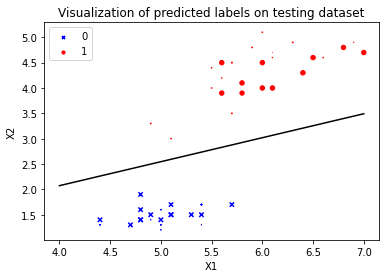

In [46]:
label = np.array(y_test)
index_0 = np.where(label==0)[0]
plt.scatter(X_test[index_0,1], X_test[index_0,2], marker='x', color='b', label='0', s=classify.h[index_0]*20)
index_1 = np.where(label==1)[0]
plt.scatter(X_test[index_1,1], X_test[index_1,2], marker='o', color='r', label='1', s=classify.h[index_1]*20)

#show the decision boundary
x1 = np.arange(4,7.5,0.5)
x2 = (- classify.W[0] - classify.W[1]*x1) / classify.W[2]
plt.plot(x1,x2,color = 'black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Visualization of predicted labels on testing dataset')
plt.legend(loc = 'upper left')
plt.show()